In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import shap
import pandas as pd
import numpy as np

**Generating an explanation for 1 iteration**

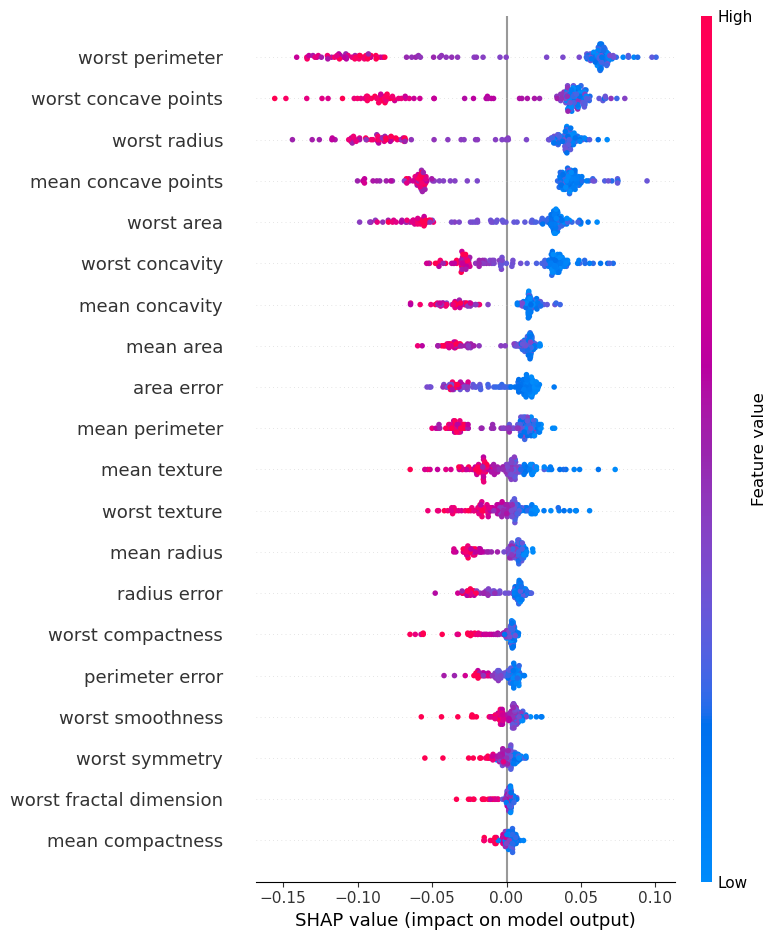

In [2]:

#loading and preparing the data
iris = load_breast_cancer()
X = iris.data
y = iris.target
columns = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

#training model
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

#explaining model
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
#shap_values of 1 for positive label
shap.summary_plot(shap_values[1], X_test)

**Generating explanations for multiple iterations and condensing in one plot.**

In [3]:
#loading and preparing the data
iris = load_breast_cancer()
X = iris.data
y = iris.target
columns = iris.feature_names
#if you don't shuffle you wont need to keep track of test_index, but I think 
#it is always good practice to shuffle your data
kf = KFold(n_splits=5,shuffle=True)

list_shap_values = list()
list_test_sets = list()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pd.DataFrame(X_train,columns=columns)
    X_test = pd.DataFrame(X_test,columns=columns)

    #training model
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)

    #explaining model
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)
    #for each iteration we save the test_set index and the shap_values
    list_shap_values.append(shap_values)
    list_test_sets.append(test_index)

Now we just need to put all these values together and generate the plot.

In [4]:
#combining results from all iterations
test_set = list_test_sets[0]
shap_values = np.array(list_shap_values[0])
for i in range(1,len(list_test_sets)):
    test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
    shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
#bringing back variable names    
X_test = pd.DataFrame(X[test_set],columns=columns)

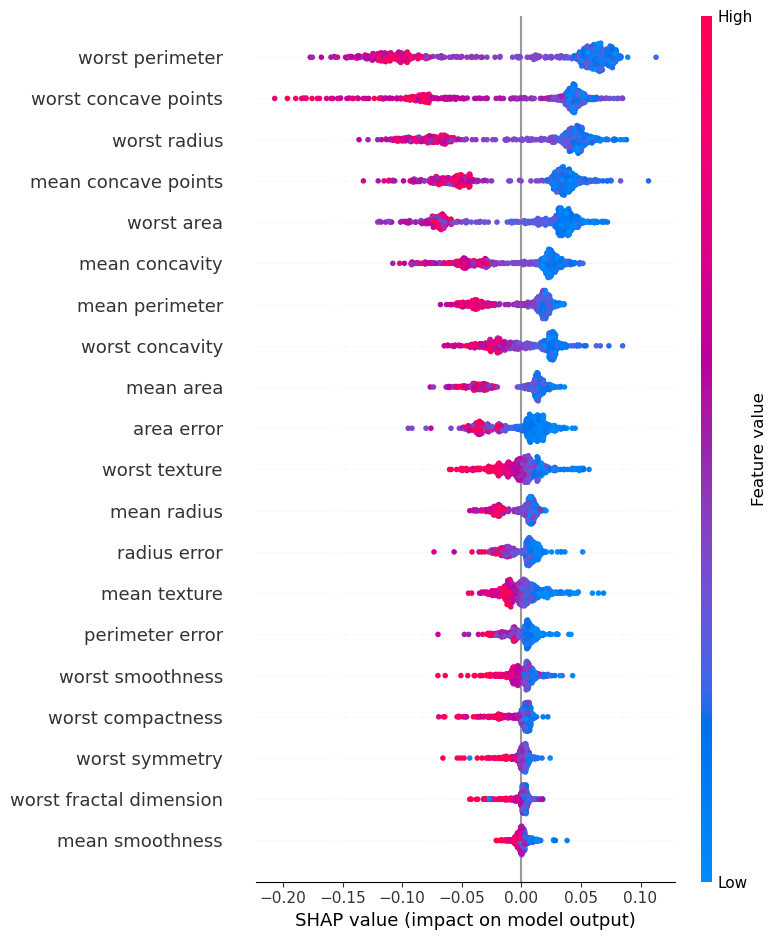

In [5]:
#creating explanation plot for the whole experiment, the first dimension from shap_values indicate the class we are predicting (0=0, 1=1)
shap.summary_plot(shap_values[1], X_test)

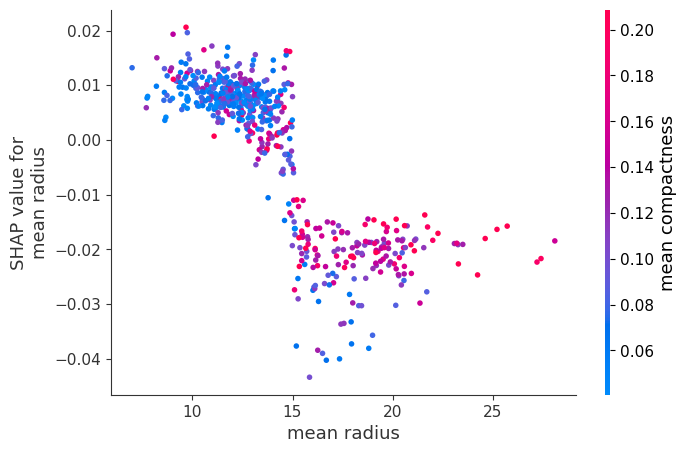

In [6]:
#dependence plot, the first number (0) is the index of the column to be plotted
shap.dependence_plot(0,shap_values[1], X_test)